In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional


print(os.getcwd())

/home/jmmcaro/PythonDir/PythonEnv/QoX/code


In [2]:
df_init = pd.read_csv('../csv/S1_Subur.csv', sep=';')
print(df_init.head())
print(list(df_init.columns))

   time  10_validity  10_timeliness  10_recall  10_quantity  10_precision  \
0   500            1              1        1.0     1.000000      0.966711   
1  1000            1              1        1.0     0.994350      0.966711   
2  1500            1              1        1.0     0.932203      0.961171   
3  2000            1              1        1.0     0.937853      0.966711   
4  2500            1              1        1.0     0.915254      0.966711   

   10_detail  10_accuracy    10_QoI  10_ThBps  ...  19_ThBps    19_PDR  \
0          1            1  0.966711  1.000000  ...  1.000000  0.921384   
1          1            1  0.961249  0.955402  ...  1.000000  0.928279   
2          1            1  0.896007  0.932754  ...  0.924234  0.877987   
3          1            1  0.906633  0.886140  ...  0.900136  0.858311   
4          1            1  0.884786  0.896068  ...  0.906320  0.861231   

   19_Jitter  19_GWAv  19_Delay    19_QoE    19_QoD  19_thruthfullness  \
0   1.000000      

In [3]:
cols_GWAv = pd.DataFrame()
cols_Jitter = pd.DataFrame()
cols_Delay = pd.DataFrame()
cols_ThBps = pd.DataFrame()
cols_quantity = pd.DataFrame()
cols_PDR = pd.DataFrame()
cols_recall = pd.DataFrame()
cols_QoE = pd.DataFrame()


cols_GWAv = df_init[['10_GWAv','11_GWAv','12_GWAv','13_GWAv','14_GWAv','15_GWAv','16_GWAv','17_GWAv','18_GWAv','19_GWAv']]
cols_Jitter = df_init[['10_Jitter','11_Jitter','12_Jitter','13_Jitter','14_Jitter','15_Jitter','16_Jitter','17_Jitter','18_Jitter','19_Jitter']]
cols_Delay = df_init[['10_Delay','11_Delay','12_Delay','13_Delay','14_Delay','15_Delay','16_Delay','17_Delay','18_Delay','19_Delay']]
cols_ThBps = df_init[['10_ThBps','11_ThBps','12_ThBps','13_ThBps','14_ThBps','15_ThBps','16_ThBps','17_ThBps','18_ThBps','19_ThBps']]
cols_quantity = df_init[['10_quantity','11_quantity','12_quantity','13_quantity','14_quantity','15_quantity','16_quantity','17_quantity','18_quantity','19_quantity']]
cols_PDR = df_init[['10_PDR','11_PDR','12_PDR','13_PDR','14_PDR','15_PDR','16_PDR','17_PDR','18_PDR','19_PDR']]
cols_recall = df_init[['10_recall','11_recall','12_recall','13_recall','14_recall','15_recall','16_recall','17_recall','18_recall','19_recall']]
cols_QoE = df_init[['10_QoE','11_QoE','12_QoE','13_QoE','14_QoE','15_QoE','16_QoE','17_QoE','18_QoE','19_QoE']]

cols2 = ['GWAv', 'Jitter', 'Delay','ThBps','quantity','PDR','recall','Decision']

df2 = pd.DataFrame(columns=cols2)


In [4]:
aux0 = pd.Series(cols_GWAv['10_GWAv'])
aux1 = pd.Series(cols_GWAv['11_GWAv'])
aux2 = pd.Series(cols_GWAv['12_GWAv'])
aux3 = pd.Series(cols_GWAv['13_GWAv'])
aux4 = pd.Series(cols_GWAv['14_GWAv'])
aux5 = pd.Series(cols_GWAv['15_GWAv'])
aux6 = pd.Series(cols_GWAv['16_GWAv'])
aux7 = pd.Series(cols_GWAv['17_GWAv'])
aux8 = pd.Series(cols_GWAv['18_GWAv'])
aux9 = pd.Series(cols_GWAv['19_GWAv'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['GWAv'] = pd.Series(aux)

[0.99999999 0.99999999 1.         ... 0.99999999 1.         1.        ]


In [5]:
aux0 = pd.Series(cols_Jitter['10_Jitter'])
aux1 = pd.Series(cols_Jitter['11_Jitter'])
aux2 = pd.Series(cols_Jitter['12_Jitter'])
aux3 = pd.Series(cols_Jitter['13_Jitter'])
aux4 = pd.Series(cols_Jitter['14_Jitter'])
aux5 = pd.Series(cols_Jitter['15_Jitter'])
aux6 = pd.Series(cols_Jitter['16_Jitter'])
aux7 = pd.Series(cols_Jitter['17_Jitter'])
aux8 = pd.Series(cols_Jitter['18_Jitter'])
aux9 = pd.Series(cols_Jitter['19_Jitter'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['Jitter'] = pd.Series(aux)

[1.         1.         1.         ... 0.83484647 0.86225376 0.87186515]


In [6]:
aux0 = pd.Series(cols_Delay['10_Delay'])
aux1 = pd.Series(cols_Delay['11_Delay'])
aux2 = pd.Series(cols_Delay['12_Delay'])
aux3 = pd.Series(cols_Delay['13_Delay'])
aux4 = pd.Series(cols_Delay['14_Delay'])
aux5 = pd.Series(cols_Delay['15_Delay'])
aux6 = pd.Series(cols_Delay['16_Delay'])
aux7 = pd.Series(cols_Delay['17_Delay'])
aux8 = pd.Series(cols_Delay['18_Delay'])
aux9 = pd.Series(cols_Delay['19_Delay'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['Delay'] = pd.Series(aux)

[1.         0.98521835 1.         ... 0.86458546 0.80444431 0.87286274]


In [7]:
aux0 = pd.Series(cols_ThBps['10_ThBps'])
aux1 = pd.Series(cols_ThBps['11_ThBps'])
aux2 = pd.Series(cols_ThBps['12_ThBps'])
aux3 = pd.Series(cols_ThBps['13_ThBps'])
aux4 = pd.Series(cols_ThBps['14_ThBps'])
aux5 = pd.Series(cols_ThBps['15_ThBps'])
aux6 = pd.Series(cols_ThBps['16_ThBps'])
aux7 = pd.Series(cols_ThBps['17_ThBps'])
aux8 = pd.Series(cols_ThBps['18_ThBps'])
aux9 = pd.Series(cols_ThBps['19_ThBps'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['ThBps'] = pd.Series(aux)

[1.         0.95540216 0.93275421 ... 0.94921521 0.72420649 0.80087199]


In [8]:
aux0 = pd.Series(cols_quantity['10_quantity'])
aux1 = pd.Series(cols_quantity['11_quantity'])
aux2 = pd.Series(cols_quantity['12_quantity'])
aux3 = pd.Series(cols_quantity['13_quantity'])
aux4 = pd.Series(cols_quantity['14_quantity'])
aux5 = pd.Series(cols_quantity['15_quantity'])
aux6 = pd.Series(cols_quantity['16_quantity'])
aux7 = pd.Series(cols_quantity['17_quantity'])
aux8 = pd.Series(cols_quantity['18_quantity'])
aux9 = pd.Series(cols_quantity['19_quantity'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['quantity'] = pd.Series(aux)

[1.         0.99435028 0.93220339 ... 0.93939394 0.78787879 0.81313131]


In [9]:
aux0 = pd.Series(cols_PDR['10_PDR'])
aux1 = pd.Series(cols_PDR['11_PDR'])
aux2 = pd.Series(cols_PDR['12_PDR'])
aux3 = pd.Series(cols_PDR['13_PDR'])
aux4 = pd.Series(cols_PDR['14_PDR'])
aux5 = pd.Series(cols_PDR['15_PDR'])
aux6 = pd.Series(cols_PDR['16_PDR'])
aux7 = pd.Series(cols_PDR['17_PDR'])
aux8 = pd.Series(cols_PDR['18_PDR'])
aux9 = pd.Series(cols_PDR['19_PDR'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['PDR'] = pd.Series(aux)

[0.88616352 0.8908805  0.9081761  ... 0.90663223 0.91037736 0.89090869]


In [10]:
aux0 = pd.Series(cols_recall['10_recall'])
aux1 = pd.Series(cols_recall['11_recall'])
aux2 = pd.Series(cols_recall['12_recall'])
aux3 = pd.Series(cols_recall['13_recall'])
aux4 = pd.Series(cols_recall['14_recall'])
aux5 = pd.Series(cols_recall['15_recall'])
aux6 = pd.Series(cols_recall['16_recall'])
aux7 = pd.Series(cols_recall['17_recall'])
aux8 = pd.Series(cols_recall['18_recall'])
aux9 = pd.Series(cols_recall['19_recall'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['recall'] = pd.Series(aux)

[1. 1. 1. ... 1. 1. 1.]


In [11]:
aux0 = pd.Series(cols_QoE['10_QoE'])
aux1 = pd.Series(cols_QoE['11_QoE'])
aux2 = pd.Series(cols_QoE['12_QoE'])
aux3 = pd.Series(cols_QoE['13_QoE'])
aux4 = pd.Series(cols_QoE['14_QoE'])
aux5 = pd.Series(cols_QoE['15_QoE'])
aux6 = pd.Series(cols_QoE['16_QoE'])
aux7 = pd.Series(cols_QoE['17_QoE'])
aux8 = pd.Series(cols_QoE['18_QoE'])
aux9 = pd.Series(cols_QoE['19_QoE'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['Decision'] = pd.Series(aux)

[0.88616352 0.83856776 0.84710508 ... 0.62116987 0.45731446 0.54298967]


In [12]:
print(df2)

       GWAv    Jitter     Delay     ThBps  quantity       PDR  recall  \
0       1.0  1.000000  1.000000  1.000000  1.000000  0.886164     1.0   
1       1.0  1.000000  0.985218  0.955402  0.994350  0.890881     1.0   
2       1.0  1.000000  1.000000  0.932754  0.932203  0.908176     1.0   
3       1.0  0.919875  0.870446  0.886140  0.937853  0.898667     1.0   
4       1.0  0.958299  0.932730  0.896068  0.915254  0.927673     1.0   
...     ...       ...       ...       ...       ...       ...     ...   
14395   1.0  0.839735  0.860942  0.820823  0.818182  0.875033     1.0   
14396   1.0  0.843594  0.851343  0.862469  0.863636  0.855165     1.0   
14397   1.0  0.834846  0.864585  0.949215  0.939394  0.906632     1.0   
14398   1.0  0.862254  0.804444  0.724206  0.787879  0.910377     1.0   
14399   1.0  0.871865  0.872863  0.800872  0.813131  0.890909     1.0   

       Decision  
0      0.886164  
1      0.838568  
2      0.847105  
3      0.637635  
4      0.743007  
...         ...

[6912, 520, 488, 1535, 3582, 3811, 8279, 9863, 434, 9195]
[2, 1, 5, 4, 4, 3, 2, 9, 2, 10]
-----------------------------
[11438, 6924, 5574, 4552, 2547, 3527, 12509, 5514, 1674, 1519]
[13, 20, 18, 16, 13, 17, 19, 14, 10, 12]
-----------------------------
[13223, 711, 11955, 7527, 8785]
[394, 249, 383, 376, 335]
-----------------------------


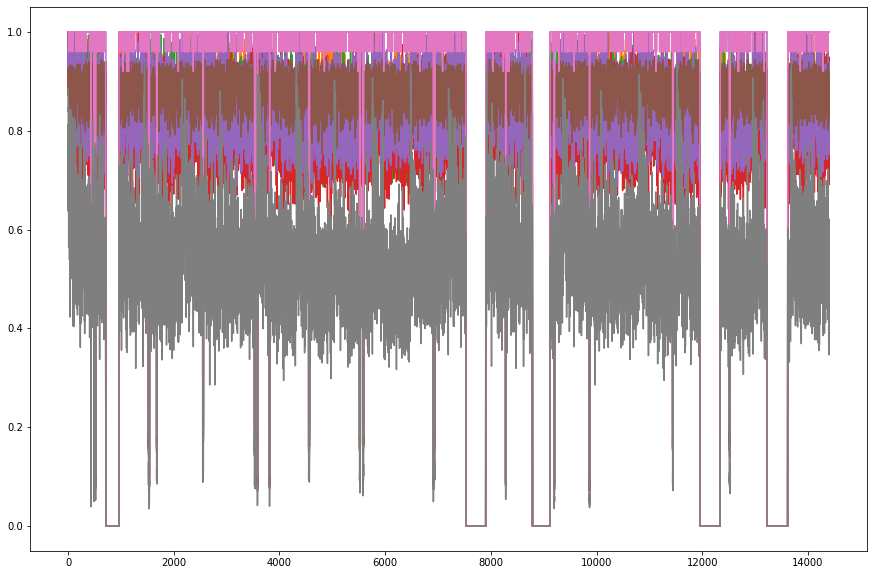

In [13]:
random.seed(42)

lent = df2['GWAv'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df2[init1[i]:init1[i]+leng1[i]] = df2[init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoE'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df2[init2[i]:init2[i]+leng2[i]] = df2[init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df2[init3[i]:init3[i]+leng3[i]] = df2[init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(df2)
plt.show()

In [14]:
from chefboost import Chefboost as chef
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score


In [15]:
y_testt = df2['Decision']
for i in range(0,df2.shape[0]):
    if(df2['Decision'][i] >=0.8 and df2['Decision'][i] <=1):
        df2['Decision'][i] = 5
    if(df2['Decision'][i] <0.8 and df2['Decision'][i]>=0.6):
        df2['Decision'][i] = 4   
    if(df2['Decision'][i] <0.6 and df2['Decision'][i]>=0.4):
        df2['Decision'][i] = 3
    if(df2['Decision'][i] <0.4 and df2['Decision'][i]>=0.2):
        df2['Decision'][i] = 2
    if(df2['Decision'][i] <0.2 and df2['Decision'][i]>=0):
        df2['Decision'][i] = 1  
        

In [16]:
print(df2.columns)
df_decision = df2['Decision']
df2 = df2.drop(['Decision'],axis=1)
print(df2)




Index(['GWAv', 'Jitter', 'Delay', 'ThBps', 'quantity', 'PDR', 'recall',
       'Decision'],
      dtype='object')
       GWAv    Jitter     Delay     ThBps  quantity       PDR  recall
0       1.0  1.000000  1.000000  1.000000  1.000000  0.886164     1.0
1       1.0  1.000000  0.985218  0.955402  0.994350  0.890881     1.0
2       1.0  1.000000  1.000000  0.932754  0.932203  0.908176     1.0
3       1.0  0.919875  0.870446  0.886140  0.937853  0.898667     1.0
4       1.0  0.958299  0.932730  0.896068  0.915254  0.927673     1.0
...     ...       ...       ...       ...       ...       ...     ...
14395   1.0  0.839735  0.860942  0.820823  0.818182  0.875033     1.0
14396   1.0  0.843594  0.851343  0.862469  0.863636  0.855165     1.0
14397   1.0  0.834846  0.864585  0.949215  0.939394  0.906632     1.0
14398   1.0  0.862254  0.804444  0.724206  0.787879  0.910377     1.0
14399   1.0  0.871865  0.872863  0.800872  0.813131  0.890909     1.0

[14400 rows x 7 columns]


In [17]:
df2_train, df2_test, dec_train, dec_test = train_test_split(df2, y_testt, test_size=0.25, shuffle=False, random_state=42)


In [18]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf_train = clf.fit(df2_train, dec_train)
dec_test = dec_test.to_numpy();
yhat = clf_train.predict(df2_test)
print(yhat)


[5. 5. 5. ... 4. 3. 3.]


In [19]:
print(len(yhat))
print(len(dec_test))

yhat2 = yhat/max(yhat)
print(yhat2)

comp = {'yhat': yhat, 'y_test': dec_test}
df_comp = pd.DataFrame(data=comp)
print(df_comp)


3600
3600
[1.  1.  1.  ... 0.8 0.6 0.6]
      yhat  y_test
0      5.0     5.0
1      5.0     5.0
2      5.0     5.0
3      4.0     4.0
4      5.0     5.0
...    ...     ...
3595   3.0     3.0
3596   3.0     3.0
3597   4.0     4.0
3598   3.0     3.0
3599   3.0     3.0

[3600 rows x 2 columns]


In [20]:
min = 0
count = 0;
notif_paper = []
notif2_paper = []

th = 0.5


for i in range(0,len(yhat)):
    #print([res_QoE['yhat'][i], res_QoE['y_test'][i]])
    if (i==0):
        notif_paper.append(0)
        notif2_paper.append(0)
    else:
        if(yhat[i] < dec_train[i-1]*th):
            notif_paper.append(1)
        else:
            notif_paper.append(0)
        
        if(dec_train[i] < dec_train[i-1]*th or dec_train[i] <=2):
            notif2_paper.append(1)
        else:
            notif2_paper.append(0)    



In [21]:
df_QoI = pd.DataFrame()
df_QoE = pd.DataFrame()
df_QoD = pd.DataFrame()
cols = ['QoE', 'QoI', 'QoD']
df = pd.DataFrame(columns=cols)
print(df)

Empty DataFrame
Columns: [QoE, QoI, QoD]
Index: []


In [22]:
df_QoI = df_init[['10_QoI','11_QoI','12_QoI','13_QoI','14_QoI','15_QoI','16_QoI','17_QoI','18_QoI','19_QoI']]
df_QoE = df_init[['10_QoE','11_QoE','12_QoE','13_QoE','14_QoE','15_QoE','16_QoE','17_QoE','18_QoE','19_QoE']]
df_QoD = df_init[['10_QoD','11_QoD','12_QoD','13_QoD','14_QoD','15_QoD','16_QoD','17_QoD','18_QoD','19_QoD']]

In [23]:
print(df_QoE)

       10_QoE    11_QoE    12_QoE    13_QoE    14_QoE    15_QoE    16_QoE  \
0    0.886164  0.899686  0.873585  0.889757  0.880975  0.913971  0.937107   
1    0.838568  0.922432  0.755924  0.887736  0.792436  0.890701  0.911321   
2    0.847105  0.650319  0.639677  0.888365  0.607287  0.874271  0.851897   
3    0.637635  0.785984  0.701438  0.905346  0.641429  0.632936  0.888728   
4    0.743007  0.519964  0.877309  0.688637  0.568753  0.910176  0.891959   
..        ...       ...       ...       ...       ...       ...       ...   
715  0.402834  0.651201  0.411431  0.465366  0.437973  0.467109  0.393501   
716  0.497480  0.523441  0.568801  0.535654  0.436294  0.542988  0.371895   
717  0.504241  0.554448  0.467965  0.411757  0.445197  0.395265  0.504460   
718  0.523382  0.568370  0.466032  0.638847  0.443639  0.497183  0.436482   
719  0.448935  0.459608  0.688615  0.563295  0.485151  0.553646  0.488513   

       17_QoE    18_QoE    19_QoE  
0    0.881447  0.907233  0.921384  
1  

In [24]:
aux0 = pd.Series(df_QoE['10_QoE'])
aux1 = pd.Series(df_QoE['11_QoE'])
aux2 = pd.Series(df_QoE['12_QoE'])
aux3 = pd.Series(df_QoE['13_QoE'])
aux4 = pd.Series(df_QoE['14_QoE'])
aux5 = pd.Series(df_QoE['15_QoE'])
aux6 = pd.Series(df_QoE['16_QoE'])
aux7 = pd.Series(df_QoE['17_QoE'])
aux8 = pd.Series(df_QoE['18_QoE'])
aux9 = pd.Series(df_QoE['19_QoE'])
aux10 = pd.Series(df_QoE['10_QoE'])
aux11 = pd.Series(df_QoE['11_QoE'])
aux12 = pd.Series(df_QoE['12_QoE'])
aux13 = pd.Series(df_QoE['13_QoE'])
aux14 = pd.Series(df_QoE['14_QoE'])
aux15 = pd.Series(df_QoE['15_QoE'])
aux16 = pd.Series(df_QoE['16_QoE'])
aux17 = pd.Series(df_QoE['17_QoE'])
aux18 = pd.Series(df_QoE['18_QoE'])
aux19 = pd.Series(df_QoE['19_QoE'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux10, aux11, aux12, aux13, aux14, aux15, aux16, aux17, aux18, aux19],axis=0)
aux = np.array(aux)
print(aux)

df['QoE'] = pd.Series(aux)




[0.88616352 0.83856776 0.84710508 ... 0.62116987 0.45731446 0.54298967]


In [25]:
print(df)

            QoE  QoI  QoD
0      0.886164  NaN  NaN
1      0.838568  NaN  NaN
2      0.847105  NaN  NaN
3      0.637635  NaN  NaN
4      0.743007  NaN  NaN
...         ...  ...  ...
14395  0.519267  NaN  NaN
14396  0.529702  NaN  NaN
14397  0.621170  NaN  NaN
14398  0.457314  NaN  NaN
14399  0.542990  NaN  NaN

[14400 rows x 3 columns]


In [26]:
aux0 = pd.Series(df_QoI['10_QoI'])
aux1 = pd.Series(df_QoI['11_QoI'])
aux2 = pd.Series(df_QoI['12_QoI'])
aux3 = pd.Series(df_QoI['13_QoI'])
aux4 = pd.Series(df_QoI['14_QoI'])
aux5 = pd.Series(df_QoI['15_QoI'])
aux6 = pd.Series(df_QoI['16_QoI'])
aux7 = pd.Series(df_QoI['17_QoI'])
aux8 = pd.Series(df_QoI['18_QoI'])
aux9 = pd.Series(df_QoI['19_QoI'])
aux10 = pd.Series(df_QoI['10_QoI'])
aux11 = pd.Series(df_QoI['11_QoI'])
aux12 = pd.Series(df_QoI['12_QoI'])
aux13 = pd.Series(df_QoI['13_QoI'])
aux14 = pd.Series(df_QoI['14_QoI'])
aux15 = pd.Series(df_QoI['15_QoI'])
aux16 = pd.Series(df_QoI['16_QoI'])
aux17 = pd.Series(df_QoI['17_QoI'])
aux18 = pd.Series(df_QoI['18_QoI'])
aux19 = pd.Series(df_QoI['19_QoI'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux10, aux11, aux12, aux13, aux14, aux15, aux16, aux17, aux18, aux19],axis=0)
aux = np.array(aux)
print(aux)

df['QoI'] = pd.Series(aux)


[0.96671106 0.96124941 0.89600685 ... 0.90812251 0.75728623 0.78606303]


In [27]:
print(df)

            QoE       QoI  QoD
0      0.886164  0.966711  NaN
1      0.838568  0.961249  NaN
2      0.847105  0.896007  NaN
3      0.637635  0.906633  NaN
4      0.743007  0.884786  NaN
...         ...       ...  ...
14395  0.519267  0.786413  NaN
14396  0.529702  0.830102  NaN
14397  0.621170  0.908123  NaN
14398  0.457314  0.757286  NaN
14399  0.542990  0.786063  NaN

[14400 rows x 3 columns]


In [28]:
aux0 = pd.Series(df_QoD['10_QoD'])
aux1 = pd.Series(df_QoD['11_QoD'])
aux2 = pd.Series(df_QoD['12_QoD'])
aux3 = pd.Series(df_QoD['13_QoD'])
aux4 = pd.Series(df_QoD['14_QoD'])
aux5 = pd.Series(df_QoD['15_QoD'])
aux6 = pd.Series(df_QoD['16_QoD'])
aux7 = pd.Series(df_QoD['17_QoD'])
aux8 = pd.Series(df_QoD['18_QoD'])
aux9 = pd.Series(df_QoD['19_QoD'])
aux10 = pd.Series(df_QoD['10_QoD'])
aux11 = pd.Series(df_QoD['11_QoD'])
aux12 = pd.Series(df_QoD['12_QoD'])
aux13 = pd.Series(df_QoD['13_QoD'])
aux14 = pd.Series(df_QoD['14_QoD'])
aux15 = pd.Series(df_QoD['15_QoD'])
aux16 = pd.Series(df_QoD['16_QoD'])
aux17 = pd.Series(df_QoD['17_QoD'])
aux18 = pd.Series(df_QoD['18_QoD'])
aux19 = pd.Series(df_QoD['19_QoD'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux10, aux11, aux12, aux13, aux14, aux15, aux16, aux17, aux18, aux19],axis=0)
aux = np.array(aux)
print(aux)

df['QoD'] = pd.Series(aux)


[0.09784125 0.43871002 0.56769547 ... 0.52314815 0.52378126 0.56397132]


In [29]:
print(df)
df_bup = df

            QoE       QoI       QoD
0      0.886164  0.966711  0.097841
1      0.838568  0.961249  0.438710
2      0.847105  0.896007  0.567695
3      0.637635  0.906633  0.545255
4      0.743007  0.884786  0.533322
...         ...       ...       ...
14395  0.519267  0.786413  0.529778
14396  0.529702  0.830102  0.532110
14397  0.621170  0.908123  0.523148
14398  0.457314  0.757286  0.523781
14399  0.542990  0.786063  0.563971

[14400 rows x 3 columns]


In [30]:
var_x = np.linspace(0.0, df.shape[0]-1, num=df.shape[0])
print(var_x)

[0.0000e+00 1.0000e+00 2.0000e+00 ... 1.4397e+04 1.4398e+04 1.4399e+04]


In [31]:
print(os.getcwd())

/home/jmmcaro/PythonDir/PythonEnv/QoX/code


[1911, 9317, 144, 1641, 2567, 12688, 8416, 11285, 4964, 11362]
[7, 9, 9, 2, 3, 7, 4, 5, 1, 4]
-----------------------------
[10112, 2605, 1835, 8372, 1147, 9643, 1550, 4423, 5167, 1764]
[20, 16, 19, 16, 20, 15, 15, 11, 15, 14]
-----------------------------
[7819, 7800, 3122, 3089, 2130]
[348, 217, 376, 397, 249]
-----------------------------


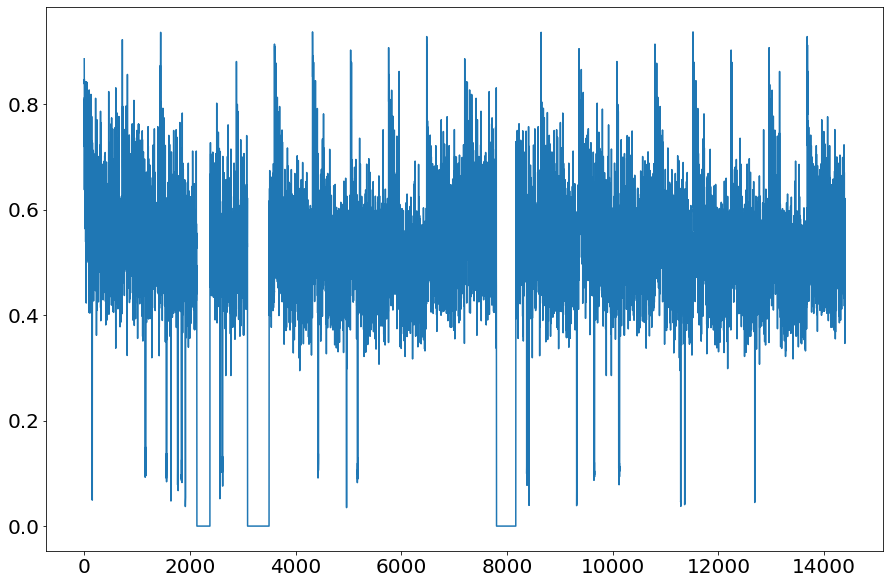

In [32]:
random.seed(44)

lent = df['QoE'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QoE'][init1[i]:init1[i]+leng1[i]] = df['QoE'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoE'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QoE'][init2[i]:init2[i]+leng2[i]] = df['QoE'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QoE'][init3[i]:init3[i]+leng3[i]] = df['QoE'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QoE'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

[9459, 11981, 6260, 14357, 14394, 3420, 11857, 3277, 917, 8120]
[3, 8, 9, 5, 8, 8, 7, 4, 8, 6]
-----------------------------
[8912, 2333, 1585, 10576, 4278, 4555, 7172, 9611, 607, 6160]
[18, 17, 19, 11, 18, 15, 18, 14, 16, 14]
-----------------------------
[11926, 337, 2786, 12019, 2235]
[206, 385, 336, 200, 317]
-----------------------------


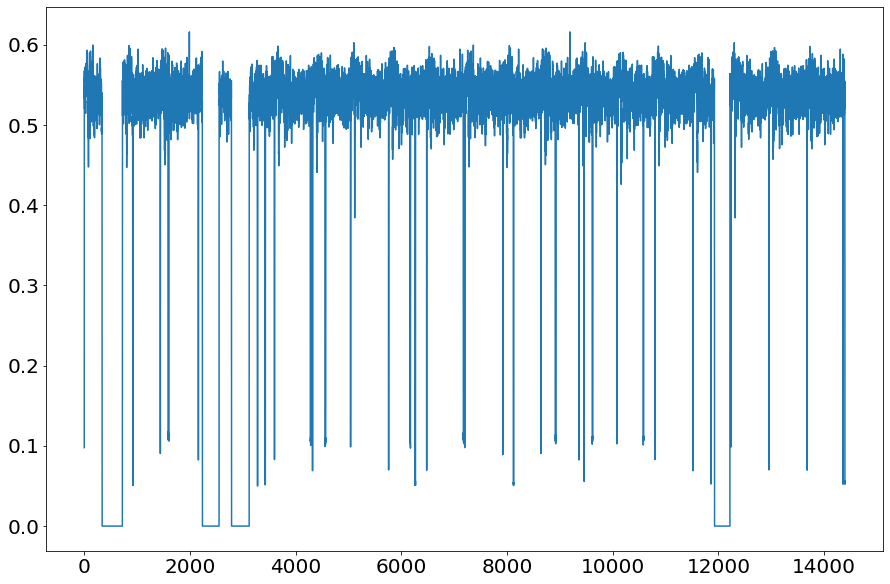

In [33]:
random.seed(54)

lent = df['QoD'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QoD'][init1[i]:init1[i]+leng1[i]] = df['QoD'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoD'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QoD'][init2[i]:init2[i]+leng2[i]] = df['QoD'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoD'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QoD'][init3[i]:init3[i]+leng3[i]] = df['QoD'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoD'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QoD'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

[1307, 14112, 6827, 7209, 3248, 11817, 403, 1370, 6601, 11132]
[8, 2, 10, 7, 9, 1, 4, 5, 4, 3]
-----------------------------
[3223, 1455, 13352, 484, 12610, 7510, 6504, 3502, 4847, 12163]
[10, 11, 12, 11, 19, 10, 19, 14, 13, 18]
-----------------------------
[5030, 12244, 5967, 11278, 7974]
[270, 481, 418, 383, 460]
-----------------------------


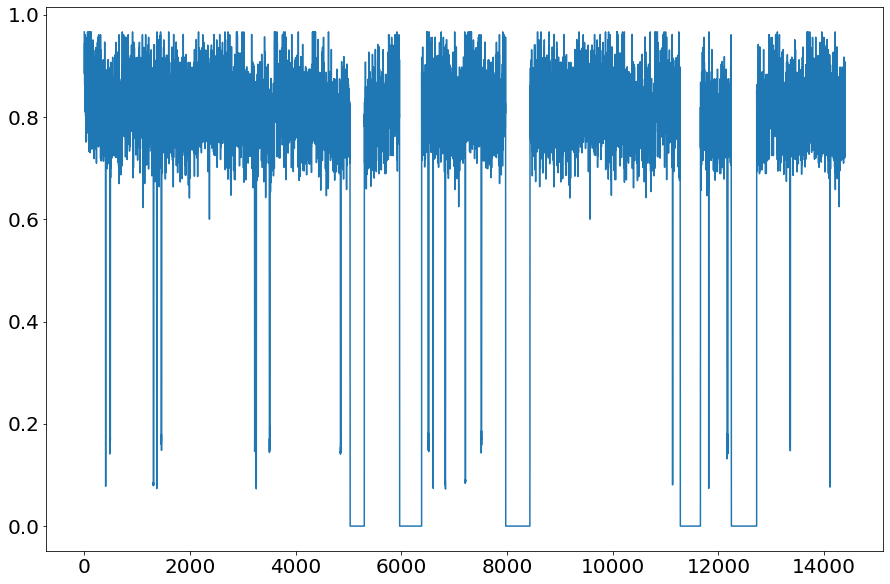

In [34]:
random.seed(64)

lent = df['QoI'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QoI'][init1[i]:init1[i]+leng1[i]] = df['QoI'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoI'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QoI'][init2[i]:init2[i]+leng2[i]] = df['QoI'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoI'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QoI'][init3[i]:init3[i]+leng3[i]] = df['QoI'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoI'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QoI'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

[7236, 13134, 7482, 8585, 4552, 7307, 2799, 5133, 4573, 8236]
[10, 9, 2, 6, 2, 5, 3, 4, 6, 2]
-----------------------------
[3850, 4410, 4182, 10876, 14302, 7159, 0, 9029, 3316, 14091]
[19, 10, 18, 10, 12, 13, 17, 12, 19, 16]
-----------------------------
[702, 334, 302, 11310, 13842]
[281, 490, 229, 311, 370]
-----------------------------


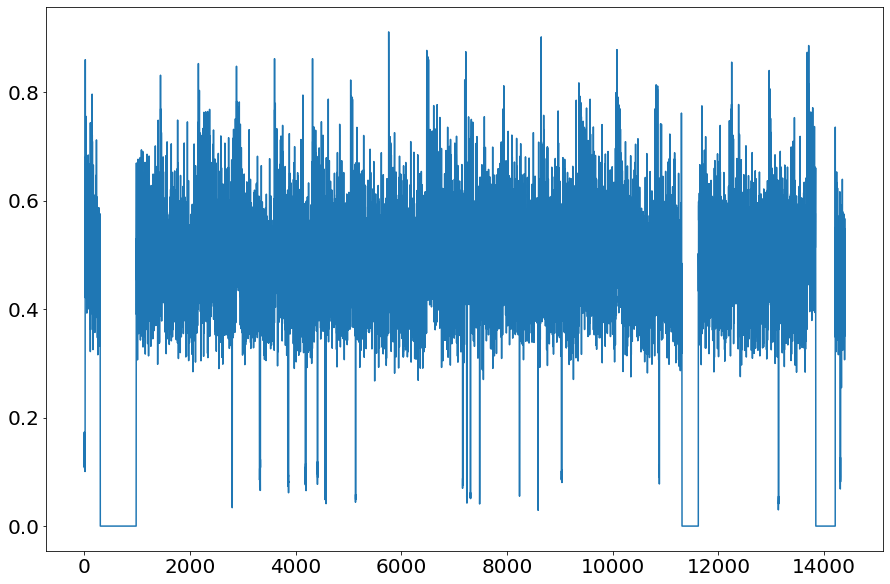

In [35]:
random.seed(74)

df['QC'] = pd.read_csv('../csv/S1_Subur_QC.csv')
lent = df['QC'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QC'][init1[i]:init1[i]+leng1[i]] = df['QC'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoE'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QC'][init2[i]:init2[i]+leng2[i]] = df['QC'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QC'][init3[i]:init3[i]+leng3[i]] = df['QC'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QC'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

In [36]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)
 


In [37]:
from sklearn.model_selection import train_test_split

# choose a number of time steps
n_steps = 5
# split into samples
X_QoE, y_QoE = split_sequence(df['QoE'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X[i], y[i])
    


In [38]:
n_features = 1
X_QoE = X_QoE.reshape((X_QoE.shape[0], X_QoE.shape[1], n_features))
#print(X_QoE)
# define model
model_QoE = Sequential()
model_QoE.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QoE.add(Dense(1))
model_QoE.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QoE, X_test_QoE, y_train_QoE, y_test_QoE = train_test_split(X_QoE, y_QoE, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QoE = model_QoE.fit(X_train_QoE, y_train_QoE, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QoE = model_QoE.predict(X_test_QoE, verbose=0)
print([yhat_QoE,y_test_QoE])

Epoch 1/150
2/2 [==============================] - 0s 25ms/step - loss: 0.2857
Epoch 2/150
2/2 [==============================] - 0s 17ms/step - loss: 0.2501
Epoch 3/150
2/2 [==============================] - 0s 19ms/step - loss: 0.2197
Epoch 4/150
2/2 [==============================] - 0s 22ms/step - loss: 0.1932
Epoch 5/150
2/2 [==============================] - 0s 23ms/step - loss: 0.1708
Epoch 6/150
2/2 [==============================] - 0s 17ms/step - loss: 0.1516
Epoch 7/150
2/2 [==============================] - 0s 10ms/step - loss: 0.1348
Epoch 8/150
2/2 [==============================] - 0s 25ms/step - loss: 0.1204
Epoch 9/150
2/2 [==============================] - 0s 21ms/step - loss: 0.1079
Epoch 10/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0969
Epoch 11/150
2/2 [==============================] - 0s 19ms/step - loss: 0.0873
Epoch 12/150
2/2 [==============================] - 0s 19ms/step - loss: 0.0789
Epoch 13/150
2/2 [==============================]

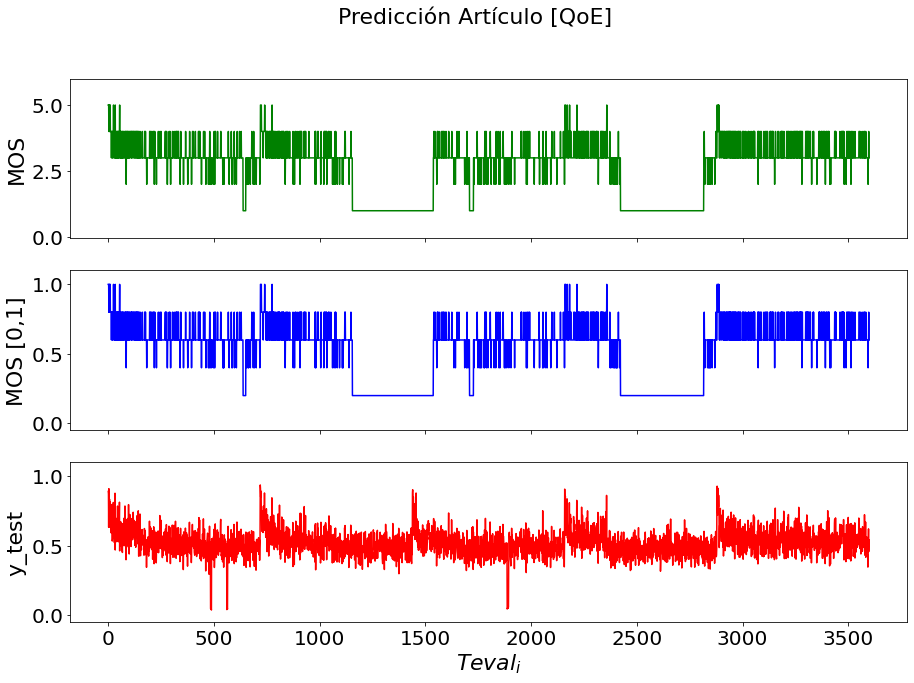

In [39]:
fig2, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción Artículo [QoE]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax1.plot(yhat,c='g')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('MOS', fontsize=22)
ax1.set_ylim([-0.05,6])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(yhat2,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('MOS [0,1]', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QoE,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Subur-paperEstimationQoE.png', format='png',bbox_inches='tight')

plt.show()

In [40]:
yhat2 = list(yhat2)
yhat2.pop()

0.6

In [41]:
print('R2 Score [QoE paper]: '+str(r2_score(y_test_QoE, yhat2)))

R2 Score [QoE paper]: -3.571142822429266


dict_keys(['loss'])


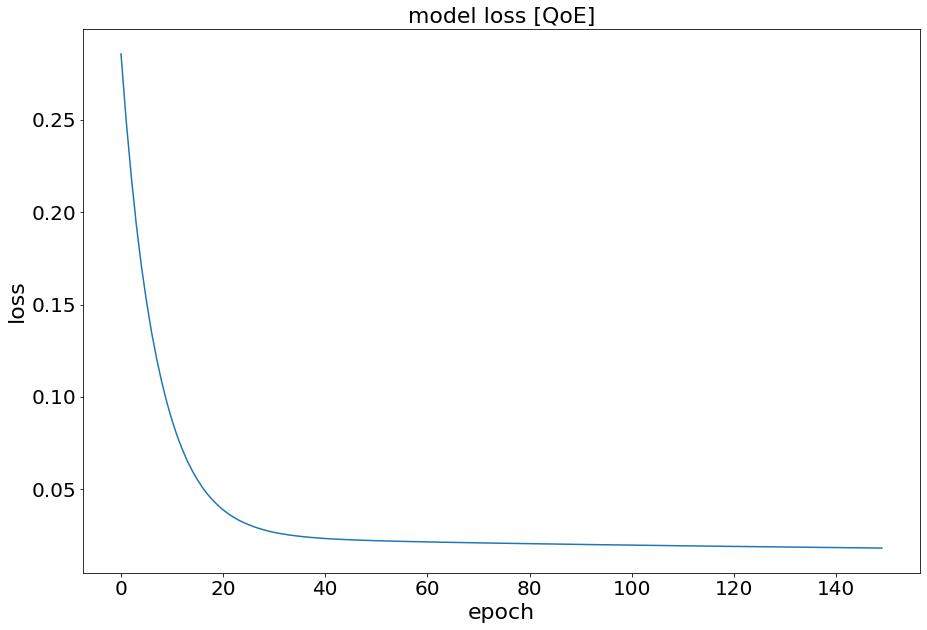

In [42]:
# list all data in history
print(history_QoE.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QoE.history['loss'])
plt.title('model loss [QoE]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Subur-model_QoE_loss-mse.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

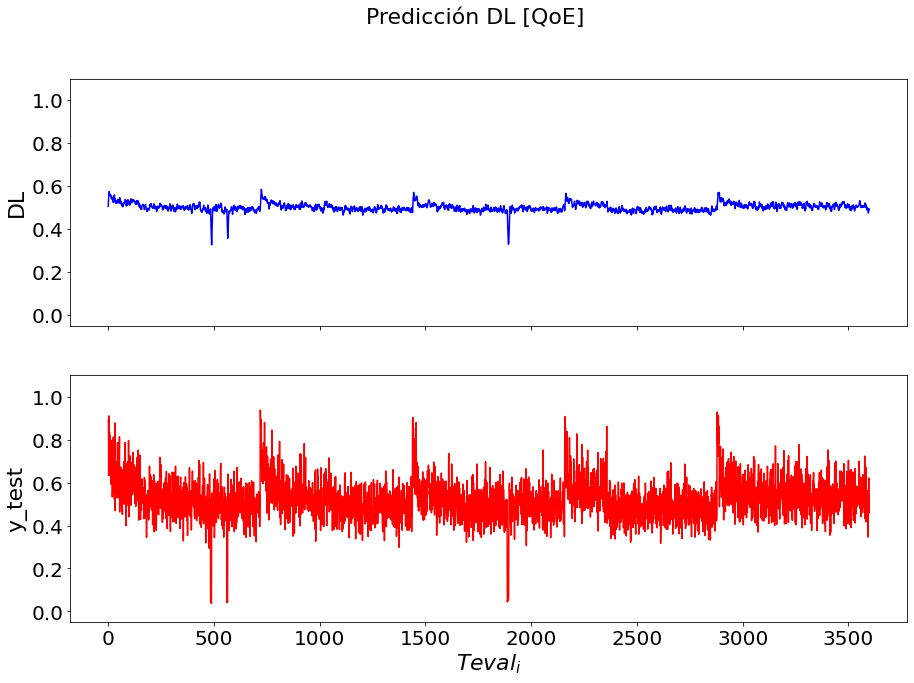

In [43]:
fig2, ((ax2), (ax3)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción DL [QoE]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax2.plot(yhat_QoE,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QoE,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Subur-modelEstimationQoE.png', format='png',bbox_inches='tight')

plt.show()

In [44]:
print('R2 Score [QoE]: '+str(r2_score(y_test_QoE, yhat_QoE)))

R2 Score [QoE]: 0.09905936746523225


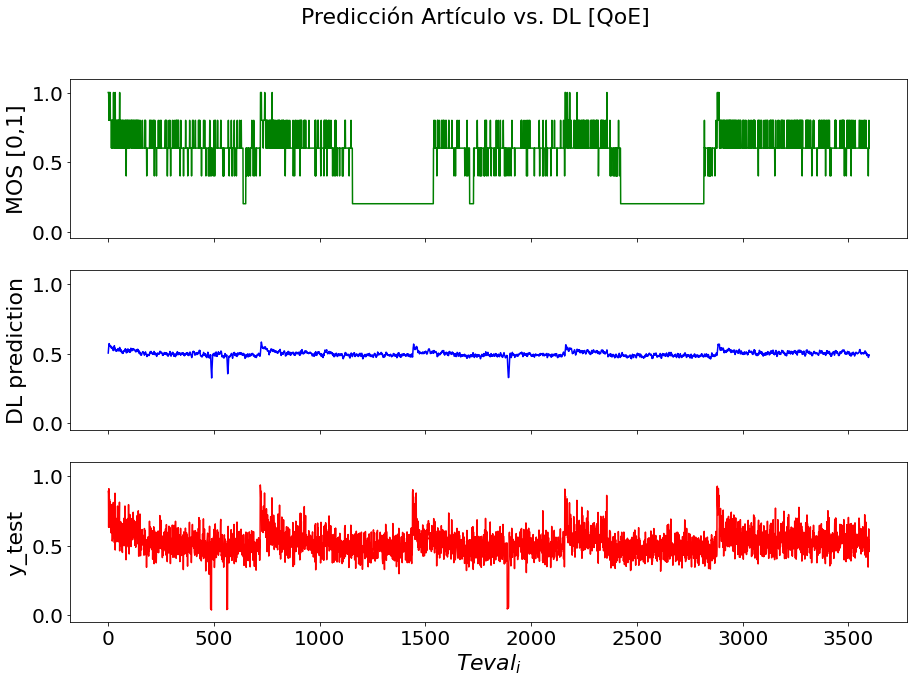

In [45]:
fig2, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción Artículo vs. DL [QoE]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax1.plot(yhat2,c='g')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('MOS [0,1]', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(yhat_QoE,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL prediction', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QoE,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Subur-comparisonPaperDLYtestQoE.png', format='png',bbox_inches='tight')

plt.show()

          yhat    y_test      diff
0     0.505862  0.890701  0.384839
1     0.528014  0.874271  0.346257
2     0.546916  0.632936  0.086020
3     0.554026  0.910176  0.356150
4     0.574084  0.744950  0.170866
...        ...       ...       ...
3594  0.474396  0.519267  0.044871
3595  0.476095  0.529702  0.053607
3596  0.481512  0.621170  0.139658
3597  0.492941  0.457314  0.035627
3598  0.492582  0.542990  0.050408

[3599 rows x 3 columns]


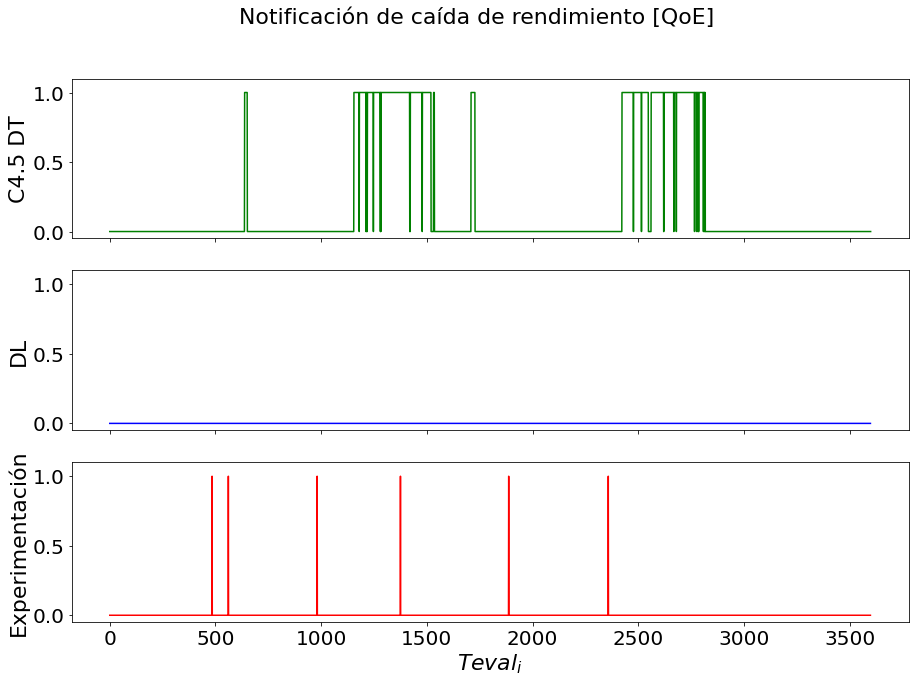

In [46]:
res_QoE = pd.DataFrame()
res_QoE['yhat'] = yhat_QoE.ravel()
res_QoE['y_test'] = y_test_QoE
res_QoE['diff'] = abs(res_QoE['yhat']-res_QoE['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoE)

min = 0
count = 0;
notif = []
notif2 = []

th = 0.5


for i in range(0,res_QoE['yhat'].shape[0]):
    #print([res_QoE['yhat'][i], res_QoE['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QoE['yhat'][i] < res_QoE['y_test'][i-1]*th or res_QoE['yhat'][i] == res_QoE['yhat'][i-1] or res_QoE['yhat'][i] <= 0.3):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QoE['y_test'][i] < res_QoE['y_test'][i-1]*th or res_QoE['y_test'][i] == res_QoE['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QoE]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax1.plot(notif_paper,c='g')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('C4.5 DT', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(x,notif2,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('Experimentación', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Subur-NotificationsQoE.png', format='png',bbox_inches='tight')

plt.show()


In [47]:
from sklearn.metrics import confusion_matrix, classification_report
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 3593
FP: 0
FN: 6
TP: 0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3593
           1       0.00      0.00      0.00         6

    accuracy                           1.00      3599
   macro avg       0.50      0.50      0.50      3599
weighted avg       1.00      1.00      1.00      3599



/home/jmmcaro/PythonDir/PythonEnv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:


notif_paper2 = notif_paper.pop()



tn, fp, fn, tp = confusion_matrix(notif2, notif_paper).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif_paper))

TN: 2836
FP: 757
FN: 5
TP: 1
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      3593
           1       0.00      0.17      0.00         6

    accuracy                           0.79      3599
   macro avg       0.50      0.48      0.44      3599
weighted avg       1.00      0.79      0.88      3599



In [49]:
print('************Diferencias Testing [QoE] **************')
print(max(res_QoE['diff']))
#print(min(res_QoE['diff']))
print(sum(res_QoE['diff'])/len(res_QoE))
print()

************Diferencias Testing [QoE] **************
0.4464773172342476
0.0672621927846009



In [50]:
# choose a number of time steps
n_steps = 5
# split into samples
X_QoI, y_QoI = split_sequence(df['QoI'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X[i], y[i])

In [51]:
n_features = 1
X_QoI = X_QoI.reshape((X_QoI.shape[0], X_QoI.shape[1], n_features))
#print(X_QoI)
# define model
model_QoI = Sequential()
model_QoI.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QoI.add(Dense(1))
model_QoI.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QoI, X_test_QoI, y_train_QoI, y_test_QoI = train_test_split(X_QoI, y_QoI, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QoI = model_QoI.fit(X_train_QoI, y_train_QoI, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QoI = model_QoI.predict(X_test_QoI, verbose=0)
print([yhat_QoI,y_test_QoI])

Epoch 1/150
2/2 [==============================] - 0s 16ms/step - loss: 0.5872
Epoch 2/150
2/2 [==============================] - 0s 14ms/step - loss: 0.4957
Epoch 3/150
2/2 [==============================] - 0s 9ms/step - loss: 0.4188
Epoch 4/150
2/2 [==============================] - 0s 14ms/step - loss: 0.3546
Epoch 5/150
2/2 [==============================] - 0s 11ms/step - loss: 0.3022
Epoch 6/150
2/2 [==============================] - 0s 10ms/step - loss: 0.2575
Epoch 7/150
2/2 [==============================] - 0s 11ms/step - loss: 0.2192
Epoch 8/150
2/2 [==============================] - 0s 8ms/step - loss: 0.1871
Epoch 9/150
2/2 [==============================] - 0s 9ms/step - loss: 0.1608
Epoch 10/150
2/2 [==============================] - 0s 11ms/step - loss: 0.1386
Epoch 11/150
2/2 [==============================] - 0s 10ms/step - loss: 0.1203
Epoch 12/150
2/2 [==============================] - 0s 13ms/step - loss: 0.1051
Epoch 13/150
2/2 [==============================] - 

dict_keys(['loss'])


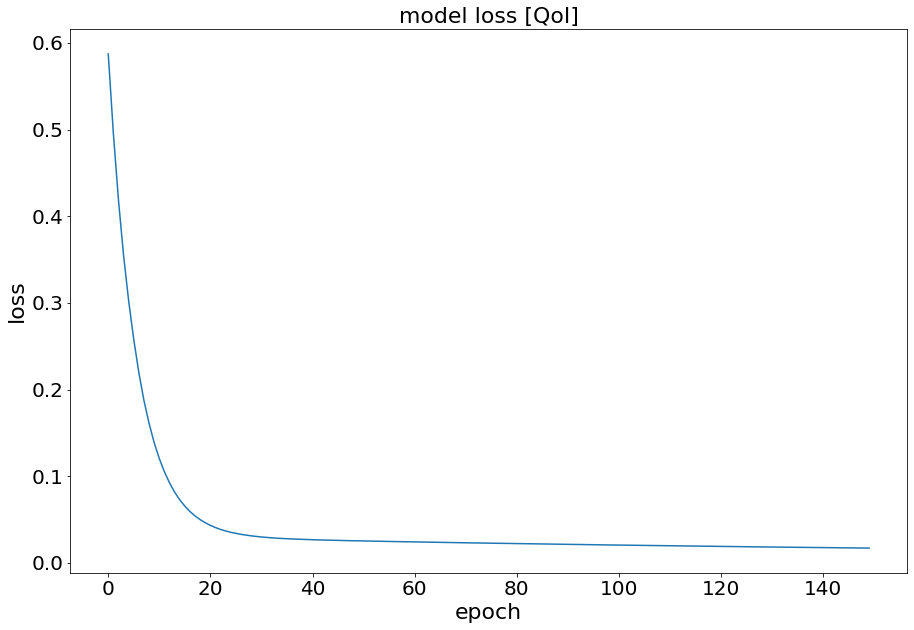

In [52]:
# list all data in history
print(history_QoI.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QoI.history['loss'])
plt.title('model loss [QoI]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Subur-model_QoI_loss-mse.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

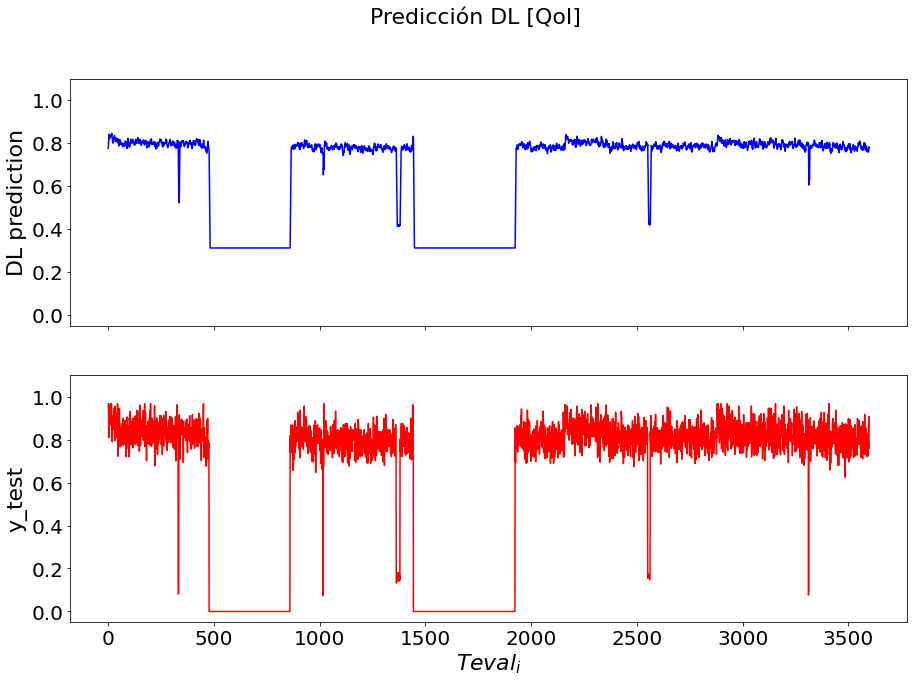

In [53]:
fig2, ( (ax2), (ax3)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción DL [QoI]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax2.plot(yhat_QoI,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL prediction', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QoI,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Subur-comparisonPaperDLYtestQoI.png', format='png',bbox_inches='tight')

plt.show()

In [54]:
print('R2 Score [QoI]: '+str(r2_score(y_test_QoI, yhat_QoI)))

R2 Score [QoI]: 0.7683170027895453


          yhat    y_test      diff
0     0.774693  0.966711  0.192018
1     0.792206  0.949929  0.157723
2     0.814145  0.808419  0.005725
3     0.819209  0.949751  0.130542
4     0.841169  0.893720  0.052551
...        ...       ...       ...
3594  0.758339  0.786413  0.028073
3595  0.758790  0.830102  0.071312
3596  0.763390  0.908123  0.144733
3597  0.782515  0.757286  0.025229
3598  0.779967  0.786063  0.006096

[3599 rows x 3 columns]


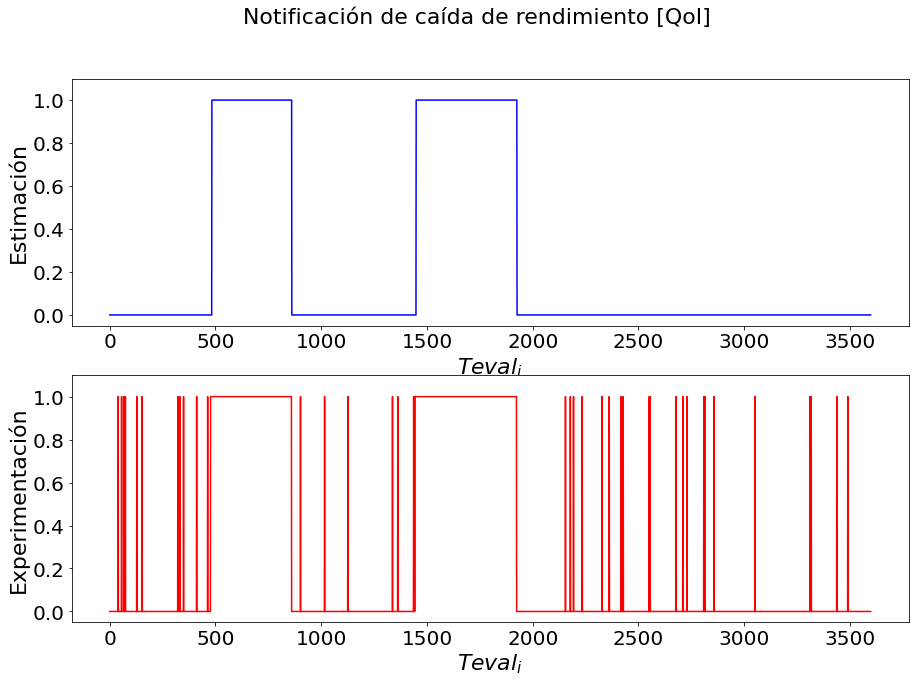

In [55]:
res_QoI = pd.DataFrame()
res_QoI['yhat'] = yhat_QoI.ravel()
res_QoI['y_test'] = y_test_QoI
res_QoI['diff'] = abs(res_QoI['yhat']-res_QoI['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoI)

notif = []
notif2 = []

th = 0.5


for i in range(0,res_QoI['yhat'].shape[0]):
    #print([res_QoI['yhat'][i], res_QoI['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QoI['yhat'][i] < res_QoI['y_test'][i-1]*th or res_QoI['yhat'][i] == res_QoI['yhat'][i-1] or res_QoE['yhat'][i] <= 0.4):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QoI['y_test'][i] < res_QoI['y_test'][i-1]*th or res_QoI['y_test'][i] == res_QoI['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QoI]',fontsize=22)
ax1.plot(x,notif,c='b')
ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('Estimación', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif2,c='r')
ax2.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('Experimentación', fontsize=22)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Subur-NotificationsQoI.png', format='png',bbox_inches='tight')

plt.show()


In [56]:
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 2692
FP: 3
FN: 52
TP: 852
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2695
           1       1.00      0.94      0.97       904

    accuracy                           0.98      3599
   macro avg       0.99      0.97      0.98      3599
weighted avg       0.98      0.98      0.98      3599



In [57]:
res_QoI = pd.DataFrame()
res_QoI['yhat'] = yhat_QoI.ravel()
res_QoI['y_test'] = y_test_QoI
res_QoI['diff'] = abs(res_QoI['yhat']-res_QoI['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoI)

          yhat    y_test      diff
0     0.774693  0.966711  0.192018
1     0.792206  0.949929  0.157723
2     0.814145  0.808419  0.005725
3     0.819209  0.949751  0.130542
4     0.841169  0.893720  0.052551
...        ...       ...       ...
3594  0.758339  0.786413  0.028073
3595  0.758790  0.830102  0.071312
3596  0.763390  0.908123  0.144733
3597  0.782515  0.757286  0.025229
3598  0.779967  0.786063  0.006096

[3599 rows x 3 columns]


In [58]:
print('************Diferencias Testing [QoI] **************')
print(max(res_QoI['diff']))
#print(min(res_QoI['diff']))
print(sum(res_QoI['diff'])/len(res_QoI))
print()

************Diferencias Testing [QoI] **************
0.8263054490089417
0.11808793107000672



In [59]:
# choose a number of time steps
n_steps = 5
# split into samples
X_QoD, y_QoD = split_sequence(df['QoD'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X_QoD[i], y_QoD[i])

In [60]:
n_features = 1
X_QoD = X_QoD.reshape((X_QoD.shape[0], X_QoD.shape[1], n_features))
#print(X_QoD)
# define model
model_QoD = Sequential()
model_QoD.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QoD.add(Dense(1))
model_QoD.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QoD, X_test_QoD, y_train_QoD, y_test_QoD = train_test_split(X_QoD, y_QoD, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QoD = model_QoD.fit(X_train_QoD, y_train_QoD, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QoD = model_QoD.predict(X_test_QoD, verbose=0)
#print([yhat_QoD,y_test_QoD])


Epoch 1/150
2/2 [==============================] - 0s 20ms/step - loss: 0.2818
Epoch 2/150
2/2 [==============================] - 0s 28ms/step - loss: 0.2514
Epoch 3/150
2/2 [==============================] - 0s 11ms/step - loss: 0.2250
Epoch 4/150
2/2 [==============================] - 0s 15ms/step - loss: 0.2017
Epoch 5/150
2/2 [==============================] - 0s 22ms/step - loss: 0.1808
Epoch 6/150
2/2 [==============================] - 0s 14ms/step - loss: 0.1623
Epoch 7/150
2/2 [==============================] - 0s 17ms/step - loss: 0.1462
Epoch 8/150
2/2 [==============================] - 0s 18ms/step - loss: 0.1318
Epoch 9/150
2/2 [==============================] - 0s 28ms/step - loss: 0.1192
Epoch 10/150
2/2 [==============================] - 0s 19ms/step - loss: 0.1081
Epoch 11/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0982
Epoch 12/150
2/2 [==============================] - 0s 14ms/step - loss: 0.0893
Epoch 13/150
2/2 [==============================]

In [61]:
yhat_QoD = model_QoD.predict(X_test_QoD, verbose=0)
print([yhat_QoD,y_test_QoD])

[array([[0.469091  ],
       [0.4652061 ],
       [0.47049475],
       ...,
       [0.41478598],
       [0.39234096],
       [0.3702135 ]], dtype=float32), array([0.3838351 , 0.56275111, 0.54061987, ..., 0.05231481, 0.05237813,
       0.05639713])]


dict_keys(['loss'])


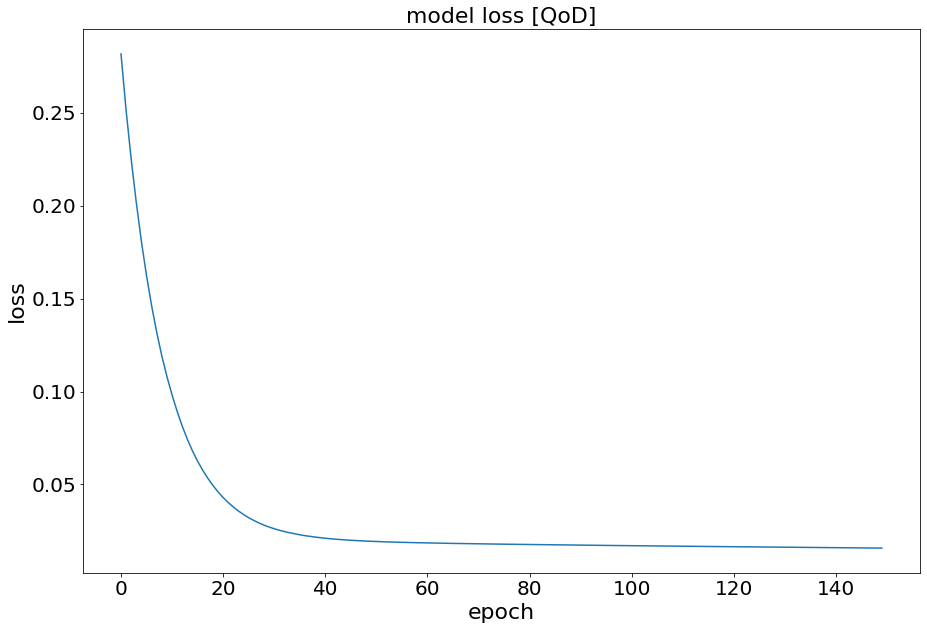

In [62]:
# list all data in history
print(history_QoD.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QoD.history['loss'])
plt.title('model loss [QoD]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Subur-model_QoD_loss-mean_squared_error.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

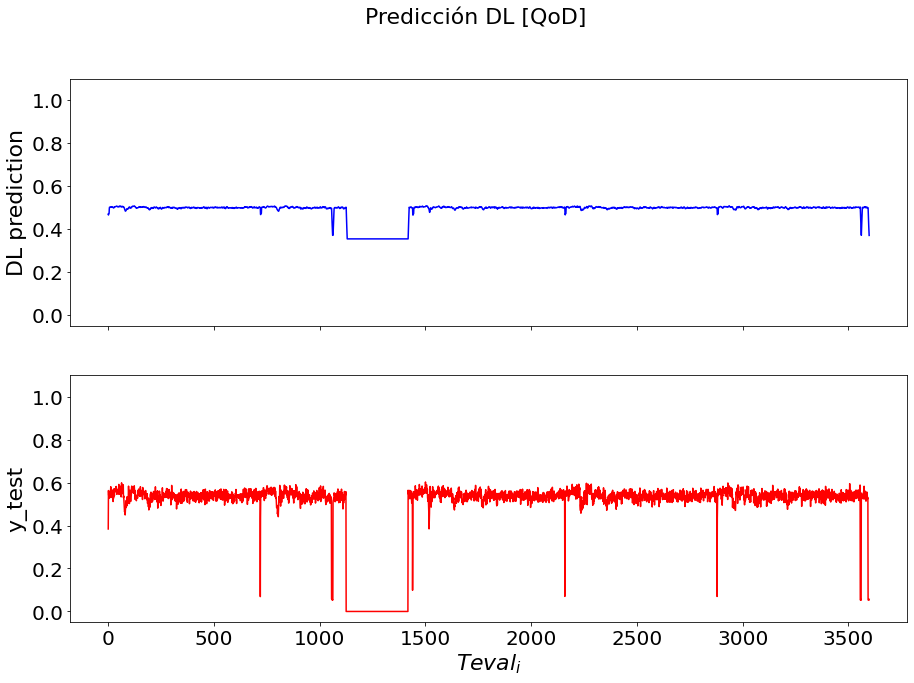

In [63]:
fig2, ((ax2), (ax3)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción DL [QoD]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)


ax2.plot(yhat_QoD,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL prediction', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QoD,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Subur-comparisonPaperDLYtestQoD.png', format='png',bbox_inches='tight')

plt.show()

In [64]:
print('R2 Score: '+str(r2_score(y_test_QoD, yhat_QoD)))

R2 Score: 0.43893738316131603


          yhat    y_test      diff
0     0.469091  0.383835  0.085256
1     0.465206  0.562751  0.097545
2     0.470495  0.540620  0.070125
3     0.472056  0.556419  0.084363
4     0.472454  0.527137  0.054683
...        ...       ...       ...
3594  0.465688  0.052978  0.412710
3595  0.438451  0.053211  0.385240
3596  0.414786  0.052315  0.362471
3597  0.392341  0.052378  0.339963
3598  0.370214  0.056397  0.313816

[3599 rows x 3 columns]


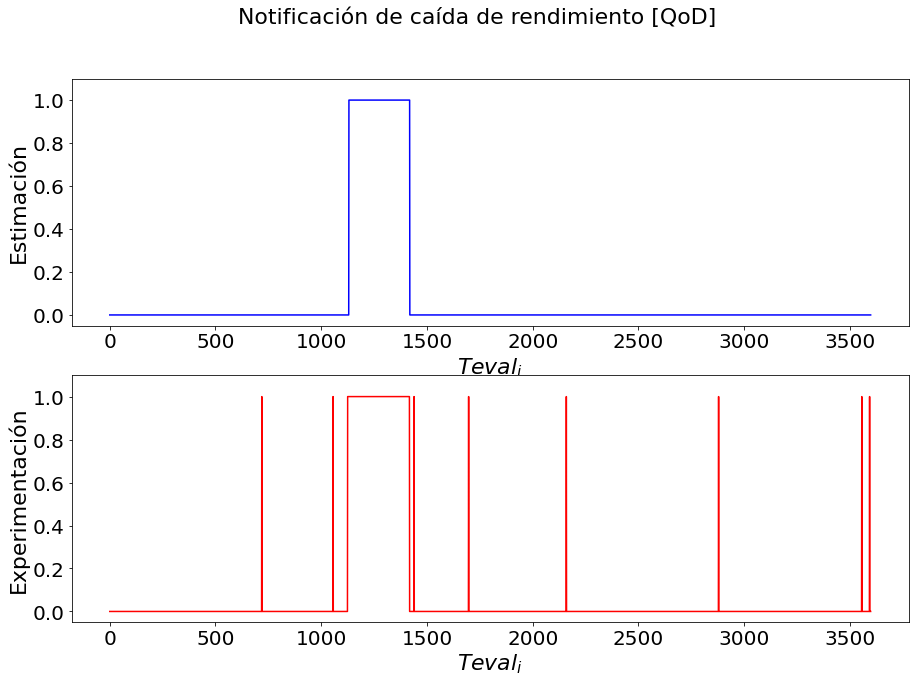

In [65]:
res_QoD = pd.DataFrame()
res_QoD['yhat'] = yhat_QoD.ravel()
res_QoD['y_test'] = y_test_QoD
res_QoD['diff'] = abs(res_QoD['yhat']-res_QoD['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoD)

min = 0
count = 0;
notif = []
notif2 = []

th = 0.5


for i in range(0,res_QoD['yhat'].shape[0]):
    #print([res_QoD['yhat'][i], res_QoD['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QoD['yhat'][i] < res_QoD['y_test'][i-1]*th or res_QoD['yhat'][i] == res_QoD['yhat'][i-1]):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QoD['y_test'][i] < res_QoD['y_test'][i-1]*th or res_QoD['y_test'][i] == res_QoD['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QoD]',fontsize=22)
ax1.plot(x,notif,c='b')
ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('Estimación', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif2,c='r')
ax2.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('Experimentación', fontsize=22)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Subur-NotificationsQoD.png', format='png',bbox_inches='tight')

plt.show()

In [66]:
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 3297
FP: 1
FN: 14
TP: 287
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3298
           1       1.00      0.95      0.97       301

    accuracy                           1.00      3599
   macro avg       1.00      0.98      0.99      3599
weighted avg       1.00      1.00      1.00      3599



In [67]:
print('************Diferencias Testing [QoD] **************')
print(max(res_QoD['diff']))
#print(min(res_QoD['diff']))
print(sum(res_QoD['diff'])/len(res_QoD))
print()

************Diferencias Testing [QoD] **************
0.5009620189666748
0.0681839186927869



In [68]:
# choose a number of time steps
n_steps = 5
# split into samples
X_QC, y_QC = split_sequence(df['QC'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X_QC[i], y_QC[i])

In [69]:
n_features = 1
X_QC = X_QC.reshape((X_QC.shape[0], X_QC.shape[1], n_features))
#print(X_QC)
# define model
model_QC = Sequential()
model_QC.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QC.add(Dense(1))
model_QC.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QC, X_test_QC, y_train_QC, y_test_QC = train_test_split(X_QC, y_QC, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QC = model_QC.fit(X_train_QC, y_train_QC, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QC = model_QC.predict(X_test_QC, verbose=0)
#print([yhat_QC,y_test_QC])


Epoch 1/150
2/2 [==============================] - 0s 25ms/step - loss: 0.2063
Epoch 2/150
2/2 [==============================] - 0s 37ms/step - loss: 0.1811
Epoch 3/150
2/2 [==============================] - 0s 39ms/step - loss: 0.1595
Epoch 4/150
2/2 [==============================] - 0s 25ms/step - loss: 0.1405
Epoch 5/150
2/2 [==============================] - 0s 32ms/step - loss: 0.1240
Epoch 6/150
2/2 [==============================] - 0s 27ms/step - loss: 0.1096
Epoch 7/150
2/2 [==============================] - 0s 25ms/step - loss: 0.0973
Epoch 8/150
2/2 [==============================] - 0s 23ms/step - loss: 0.0865
Epoch 9/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0772
Epoch 10/150
2/2 [==============================] - 0s 23ms/step - loss: 0.0692
Epoch 11/150
2/2 [==============================] - 0s 22ms/step - loss: 0.0623
Epoch 12/150
2/2 [==============================] - 0s 28ms/step - loss: 0.0561
Epoch 13/150
2/2 [==============================]

In [70]:
yhat_QC = model_QC.predict(X_test_QC, verbose=0)
print([yhat_QC,y_test_QC])

[array([[0.47511956],
       [0.4858775 ],
       [0.49855658],
       ...,
       [0.457335  ],
       [0.45668757],
       [0.45149592]], dtype=float32), array([0.74430171, 0.7691867 , 0.64083308, ..., 0.48022978, 0.35083684,
       0.52572066])]


dict_keys(['loss'])


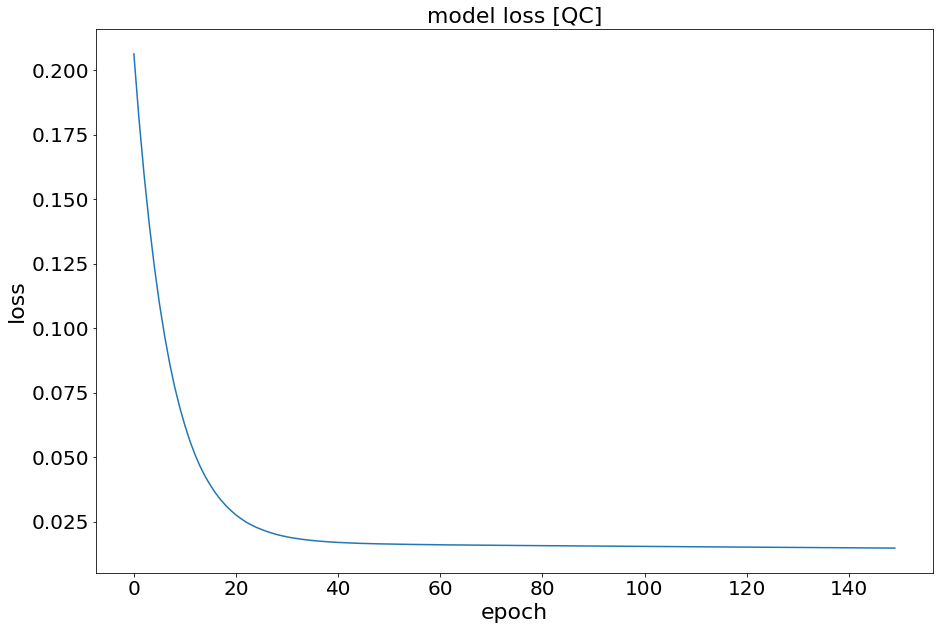

In [71]:
# list all data in history
print(history_QC.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QC.history['loss'])
plt.title('model loss [QC]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Subur-model_QC_loss-mean_squared_error.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

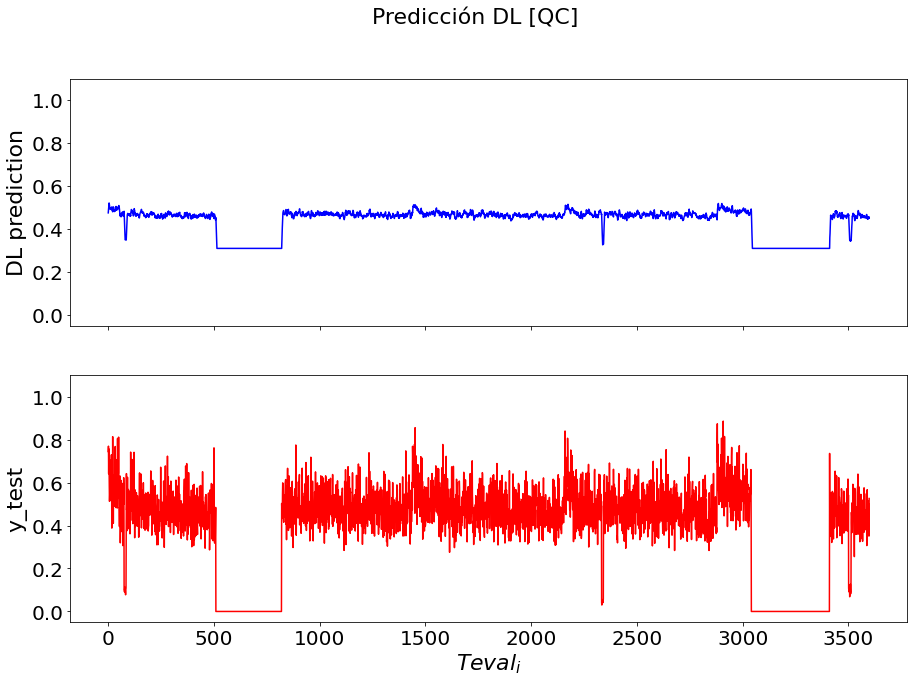

In [72]:
fig2, ( (ax2), (ax3)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Predicción DL [QC]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)


ax2.plot(yhat_QC,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL prediction', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(y_test_QC,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('y_test', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Subur-comparisonPaperDLYtestQC.png', format='png',bbox_inches='tight')

plt.show()

In [73]:
print('R2 Score: '+str(r2_score(y_test_QC, yhat_QC)))

R2 Score: 0.413618239133707


          yhat    y_test      diff
0     0.475120  0.744302  0.269182
1     0.485878  0.769187  0.283309
2     0.498557  0.640833  0.142276
3     0.505776  0.756660  0.250884
4     0.521184  0.642211  0.121027
...        ...       ...       ...
3594  0.456185  0.383132  0.073053
3595  0.448271  0.501820  0.053549
3596  0.457335  0.480230  0.022895
3597  0.456688  0.350837  0.105851
3598  0.451496  0.525721  0.074225

[3599 rows x 3 columns]


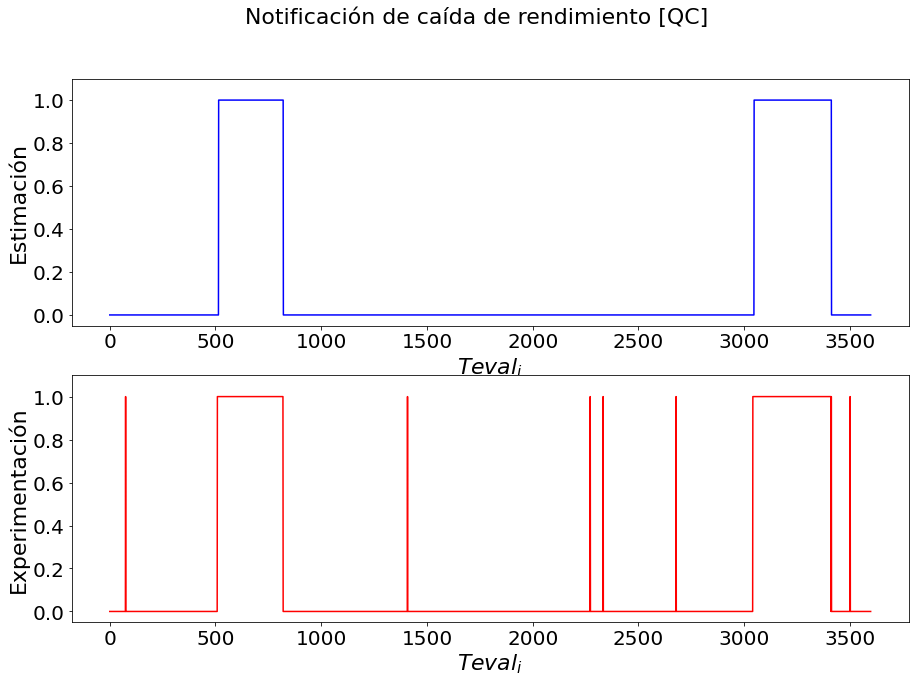

In [74]:
res_QC = pd.DataFrame()
res_QC['yhat'] = yhat_QC.ravel()
res_QC['y_test'] = y_test_QC
res_QC['diff'] = abs(res_QC['yhat']-res_QC['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QC)

min = 0
count = 0;
notif = []
notif2 = []

th = 0.5


for i in range(0,res_QC['yhat'].shape[0]):
    #print([res_QC['yhat'][i], res_QC['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QC['yhat'][i] < res_QC['y_test'][i-1]*th or res_QC['yhat'][i] == res_QC['yhat'][i-1] ):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QC['y_test'][i] < res_QC['y_test'][i-1]*th or res_QC['y_test'][i] == res_QC['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QC]',fontsize=22)
ax1.plot(x,notif,c='b')
ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('Estimación', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif2,c='r')
ax2.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('Experimentación', fontsize=22)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S1Subur-NotificationsQC.png', format='png',bbox_inches='tight')

plt.show()

In [75]:
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 2909
FP: 2
FN: 18
TP: 670
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2911
           1       1.00      0.97      0.99       688

    accuracy                           0.99      3599
   macro avg       1.00      0.99      0.99      3599
weighted avg       0.99      0.99      0.99      3599

